FLIGHT DELAY ANALYSIS- Predict whether or not a flight will be cancelled

In [30]:
# Imports

# local settings and specifications
import settings
import os
# pandas
import pandas as pd

# visual aids
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# machine learning
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Load and preview flight data 

In [31]:

df1 = pd.read_csv(os.path.join(settings.DATA_DIR, "airlines.csv"))
df1.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [32]:
df2 = pd.read_csv(os.path.join(settings.DATA_DIR,"airports.csv"))
df2.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [33]:
df3 = pd.read_csv(os.path.join(settings.DATA_DIR,"Flights.csv"))
df3.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999999 entries, 0 to 999998
Data columns (total 31 columns):
YEAR                   999999 non-null int64
MONTH                  999999 non-null int64
DAY                    999999 non-null int64
DAY_OF_WEEK            999999 non-null int64
AIRLINE                999999 non-null object
FLIGHT_NUMBER          999999 non-null int64
TAIL_NUMBER            992290 non-null object
ORIGIN_AIRPORT         999999 non-null object
DESTINATION_AIRPORT    999999 non-null object
SCHEDULED_DEPARTURE    999999 non-null int64
DEPARTURE_TIME         960841 non-null float64
DEPARTURE_DELAY        960841 non-null float64
TAXI_OUT               960144 non-null float64
WHEELS_OFF             960144 non-null float64
SCHEDULED_TIME         999997 non-null float64
ELAPSED_TIME           957393 non-null float64
AIR_TIME               957393 non-null float64
DISTANCE               999999 non-null int64
WHEELS_ON              959116 non-null float64
TAXI_IN       

0    959867
1     40132
Name: CANCELLED, dtype: int64


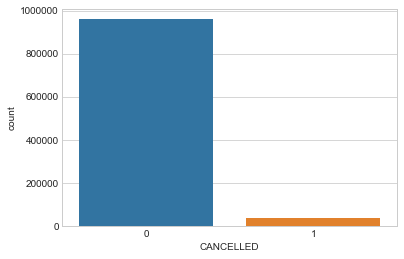

In [35]:
#How many flights were cancelled in the year 2015 ?

print(df3['CANCELLED'].value_counts())
sns.countplot(x='CANCELLED', data=df3)

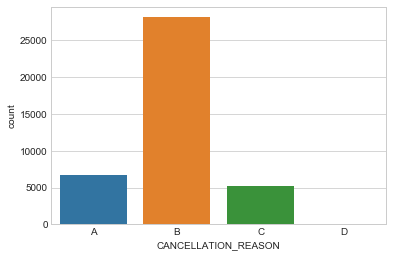

In [36]:
#Reason for cancellation -
sns.countplot(x="CANCELLATION_REASON",data=df3)

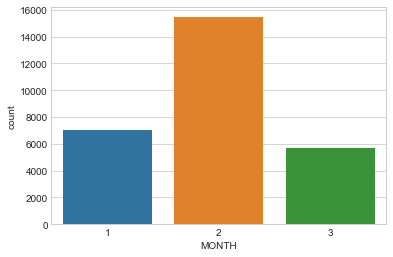

In [37]:
#Since weather is the reason of highest cancellations ,we plot in which month did weather related cancellations happen-
sns.countplot(x = "MONTH",data=df3[df3["CANCELLATION_REASON"]=='B'])


In [38]:
# next we will integrate the latitude/longitude information into the flights dataframe
df2 = df2.set_index("IATA_CODE")
for loc in ['ORIGIN','DESTINATION']:
        for dir in ['LATITUDE','LONGITUDE']:
            df3[loc+'_'+dir] =(df2[dir][df3[loc+"_AIRPORT"][:]]).reset_index()[[dir]]
df3.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,ORIGIN_LATITUDE,ORIGIN_LONGITUDE,DESTINATION_LATITUDE,DESTINATION_LONGITUDE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,NaN,NaN,NaN,NaN,NaN,NaN,61.17432,-149.99619,47.44898,-122.30931
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,NaN,NaN,NaN,NaN,NaN,NaN,33.94254,-118.40807,26.68316,-80.09559
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,NaN,NaN,NaN,NaN,NaN,NaN,37.61900,-122.37484,35.21401,-80.94313
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,NaN,NaN,NaN,NaN,NaN,NaN,33.94254,-118.40807,25.79325,-80.29056
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,NaN,NaN,NaN,NaN,NaN,NaN,47.44898,-122.30931,61.17432,-149.99619


In [39]:
def barplot_feature(df,feature, target = 'CANCELLED',cut = False, bins = 3):
    '''Plot of cancellation rate for various features. More continuous features can be binned together to convert
    to ranges of values
    
    df: the dataframe with the flight data
    feature: the feature to be plotted, must be a string a match a feature in df
    target: the prediction value, must be a string and match a feature in df
    cut: use cut if feature has continuous values.  '''
    if cut == True:
        # define a new feature which specifies a range of values for 'feature'.  ranges are determined according to 'bin'
        df['bins'] = pd.cut(df3[feature],bins)
        group_df = df[['bins',target]].groupby(['bins']).mean()
        return group_df.plot(kind='bar')
        #plt.title(feature)
    else:
        group_df = df[[feature,target]].groupby([feature],as_index=False).mean()
        return sns.barplot(x = feature, y = target, data=group_df)
        

Text(0.5,1,'Origin_Longitude')

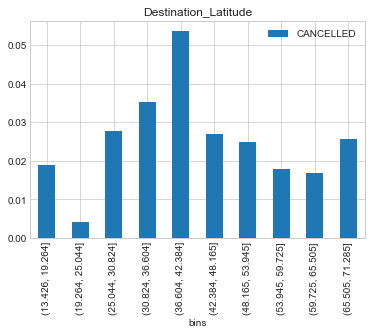

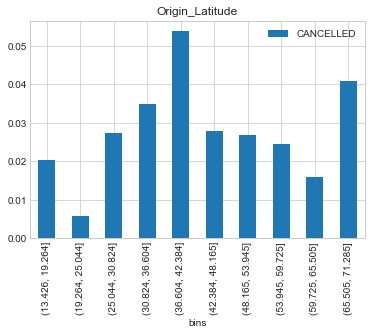

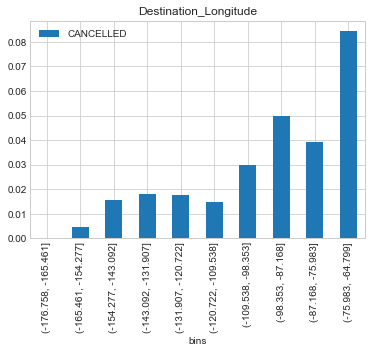

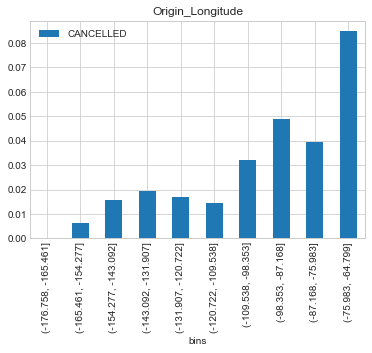

In [40]:
#how much does airport location play a role?
barplot_feature(df3,'DESTINATION_LATITUDE',cut = True, bins = 10)
plt.title('Destination_Latitude')
barplot_feature(df3,'ORIGIN_LATITUDE',cut = True, bins = 10)
plt.title('Origin_Latitude')
barplot_feature(df3,'DESTINATION_LONGITUDE',cut = True, bins = 10)
plt.title('Destination_Longitude')
barplot_feature(df3,'ORIGIN_LONGITUDE',cut = True, bins = 10)
plt.title('Origin_Longitude')

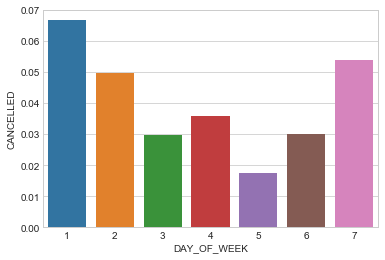

In [41]:
#day of week with highest cancellation
barplot_feature(df3,'DAY_OF_WEEK')

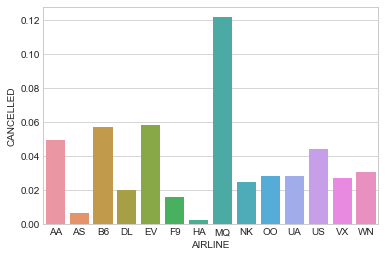

In [42]:
#airline analysis
barplot_feature(df3,'AIRLINE')

In [43]:

def preprocess(dataframe,features,dummy_features, predictor, reason='B'):
    
    if predictor == ["CANCELLED"]:
        y = dataframe[predictor]
    else:
       
        y = dataframe[['CANCELLATION_REASON']].fillna(value=0)
      
        y = pd.get_dummies(y['CANCELLATION_REASON'],prefix="REASON")[['REASON_' + reason]]
    
   
    processed = dataframe[features]
    
    processed = pd.concat([processed,y],axis=1)
    processed = processed.dropna()
   
   
    new_dummy_features = []
    for feature in dummy_features:
        dummy_df = pd.get_dummies(processed[feature],prefix=feature)
        new_dummy_features.append(list(dummy_df.columns))
        processed = pd.concat([processed,dummy_df], axis=1).drop([feature],axis=1)

    
    new_dummy_features = [item for sublist in new_dummy_features for item in sublist]     

    return processed,new_dummy_features

In [44]:

features = ["MONTH","DAY_OF_WEEK","AIRLINE","SCHEDULED_DEPARTURE","SCHEDULED_ARRIVAL",
                       "DISTANCE", "SCHEDULED_TIME","ORIGIN_LATITUDE","ORIGIN_LONGITUDE",
                       "DESTINATION_LATITUDE","DESTINATION_LONGITUDE"]
dummy_features = ["MONTH","DAY_OF_WEEK","AIRLINE"]
predictor = ["CANCELLED"]

processed,new_dummy_features = preprocess(df3,features,dummy_features,predictor)
processed.head()

,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,DISTANCE,SCHEDULED_TIME,ORIGIN_LATITUDE,ORIGIN_LONGITUDE,DESTINATION_LATITUDE,DESTINATION_LONGITUDE,CANCELLED,MONTH_1,...,AIRLINE_EV,AIRLINE_F9,AIRLINE_HA,AIRLINE_MQ,AIRLINE_NK,AIRLINE_OO,AIRLINE_UA,AIRLINE_US,AIRLINE_VX,AIRLINE_WN
0,5,430,1448,205.0,61.17432,-149.99619,47.44898,-122.30931,0,1,...,0,0,0,0,0,0,0,0,0,0
1,10,750,2330,280.0,33.94254,-118.40807,26.68316,-80.09559,0,1,...,0,0,0,0,0,0,0,0,0,0
2,20,806,2296,286.0,37.61900,-122.37484,35.21401,-80.94313,0,1,...,0,0,0,0,0,0,0,1,0,0
3,20,805,2342,285.0,33.94254,-118.40807,25.79325,-80.29056,0,1,...,0,0,0,0,0,0,0,0,0,0
4,25,320,1448,235.0,47.44898,-122.30931,61.17432,-149.99619,0,1,...,0,0,0,0,0,0,0,0,0,0


In [45]:

def compute_false_negatives(target, predictions):
    
    df = pd.DataFrame({"target": target, "predictions": predictions})
    return df[(df["target"] == 1) & (df["predictions"] == 0)].shape[0] / (df[(df["target"] == 1)].shape[0] + 1)

def compute_false_positives(target, predictions):
   
    df = pd.DataFrame({"target": target, "predictions": predictions})
    return df[(df["target"] == 0) & (df["predictions"] == 1)].shape[0] / (df[(df["target"] == 0)].shape[0] + 1)

In [46]:

def split(processed, predictor, reason="B"):
    #prepare predictor, feature data, with correct shape
    if predictor == ["CANCELLED"]:
        y = processed[predictor].values
        X = processed.drop(predictor,axis=1)
    else:
        y = processed[['REASON_'+reason]].values
        X = processed.drop(['REASON_'+reason],axis=1)
    c,r = y.shape
    y = y.reshape(c,)
    #split into train and test sets
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)
    return X_train,X_test,y_train,y_test

def scale(X_train,X_test,new_dummy_features):
    X_train_dummy = X_train[new_dummy_features].values
    X_test_dummy = X_test[new_dummy_features].values
    X_train = X_train.drop(new_dummy_features,axis=1).values
    X_test = X_test.drop(new_dummy_features,axis=1).values
    #standarize non dummy features using training set
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_transformed = scaler.transform(X_train)
    #recombine training sets
    X_train_final = np.concatenate((X_train_transformed,X_train_dummy),axis=1)
    #scale test set using training fits
    X_test_transformed = scaler.transform(X_test)
    #recombine
    X_test_final = np.concatenate((X_test_transformed,X_test_dummy),axis=1)
    return X_train_final, X_test_final

def predict_score(X_train_final,y_train,X_test_final,y_test):
    # train a logistic regression model
    clf = LogisticRegression(random_state=1, class_weight="balanced").fit(X_train_final, y_train)
    predictions = clf.predict(X_test_final)
    score = clf.score(X_test_final,y_test)
    return predictions, score


In [47]:
#If the flight has been cancelled or not
X_train,X_test,y_train,y_test = split(processed,predictor)
X_train_final,X_test_final = scale(X_train,X_test,new_dummy_features)
predictions,score = predict_score(X_train_final,y_train,X_test_final,y_test)
fn = compute_false_negatives(y_test, predictions)
fp = compute_false_positives(y_test, predictions)
print("Accuracy Score: {}".format(score))
print("False Negatives: {}".format(fn))
print("False Positives: {}".format(fp))


Accuracy Score: 0.6964457348818582
False Negatives: 0.293107822410148
False Positives: 0.30398134926012016


## Predict weather related cancellations


In [48]:

predictor = ["CANCELLATION_REASON"]
processed,new_dummy_features = preprocess(df3,features,dummy_features,predictor)
X_train,X_test,y_train,y_test = split(processed,predictor)
X_train_final,X_test_final = scale(X_train,X_test,new_dummy_features)
predictions,score = predict_score(X_train_final,y_train,X_test_final,y_test)
fn = compute_false_negatives(y_test, predictions)
fp = compute_false_positives(y_test, predictions)
print("Accuracy Score: {}".format(score))
print("False Negatives: {}".format(fn))
print("False Positives: {}".format(fp))

Accuracy Score: 0.7068014951274864
False Negatives: 0.2696588868940754
False Positives: 0.2938716798209326


In [49]:
#RandomForestClassifier
model= RandomForestClassifier()
model.fit(X_train_final, y_train)
predicted= model.predict(X_test_final)
print("Random Forest Classifier: {}".format(predicted))
score = model.score(X_test_final,y_test)
print("Random Forest Classifier: {}".format(score))

Random Forest Classifier: [0 0 0 ... 0 0 0]
Random Forest Classifier: 0.9623748498197837


In [50]:
#K-means
k_means = KMeans(n_clusters=3)
k_means = k_means.fit(X_train_final,y_test)
labels=k_means.predict(X_test_final)
centroids=k_means.cluster_centers_
print(centroids)
print("Kmeans Classifier :" , labels)



[[ 8.36578235e-01  8.30560816e-01 -3.31165255e-01 -3.39130604e-01
  -3.66136606e-02  7.12836585e-02  2.93264711e-02  9.62793186e-02
   4.69260973e-01  4.31864653e-01  9.88743742e-02  1.46005285e-01
   1.39599340e-01  1.43512197e-01  1.61656715e-01  1.63715041e-01
   1.04818385e-01  1.40693038e-01  8.53152364e-02  2.11335059e-02
   4.26372387e-02  1.34028952e-01  1.25564681e-01  1.52676163e-02
   1.19185908e-02  7.20583940e-02  1.84536061e-02  1.14053680e-01
   5.94265218e-02  6.36280883e-02  6.22253018e-03  2.30291358e-01]
 [-8.20024773e-01 -8.49343635e-01 -3.36127194e-01 -3.18592135e-01
   2.69619652e-02  3.58490720e-02 -2.58735160e-02  5.49581188e-02
   4.68353334e-01  4.28075154e-01  1.03571512e-01  1.46034633e-01
   1.41128508e-01  1.42627324e-01  1.58071790e-01  1.62298451e-01
   1.28145432e-01  1.21693862e-01  8.09427219e-02  2.25821601e-02
   4.63866878e-02  1.31346236e-01  1.24215203e-01  1.28132109e-02
   1.36925162e-02  7.60798969e-02  1.93147414e-02  1.19822007e-01
   6.1298

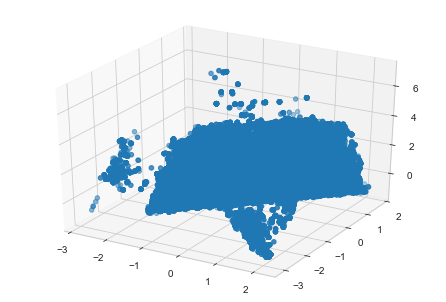

In [51]:
fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(X_test_final[:, 0], X_test_final[:, 1], X_test_final[:, 2])